In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
titanic_df=pd.read_csv('titanic.csv')

In [9]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

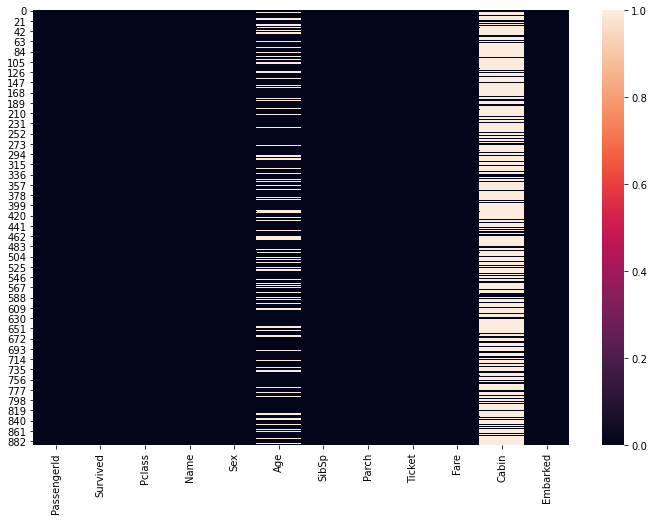

In [15]:
plt.figure(figsize=(12 , 8))  #to expand the image or graph
sns.heatmap(titanic_df.isnull())

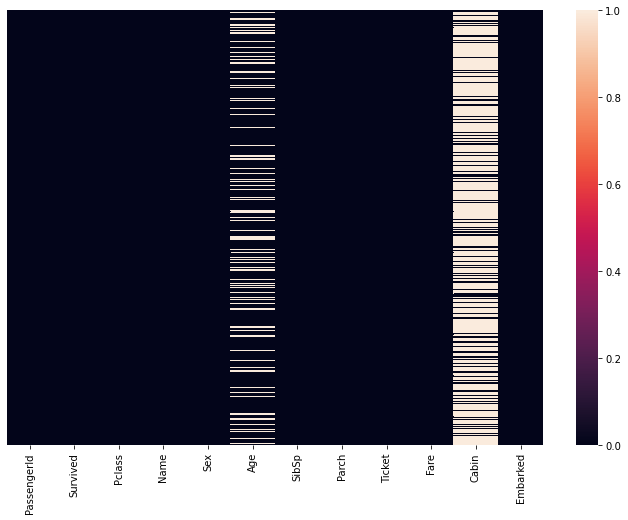

In [16]:
plt.figure(figsize=(12 , 8))  #to expand the image or graph
sns.heatmap(titanic_df.isnull(), yticklabels=False) #yticklabels is for removing LHS numbers

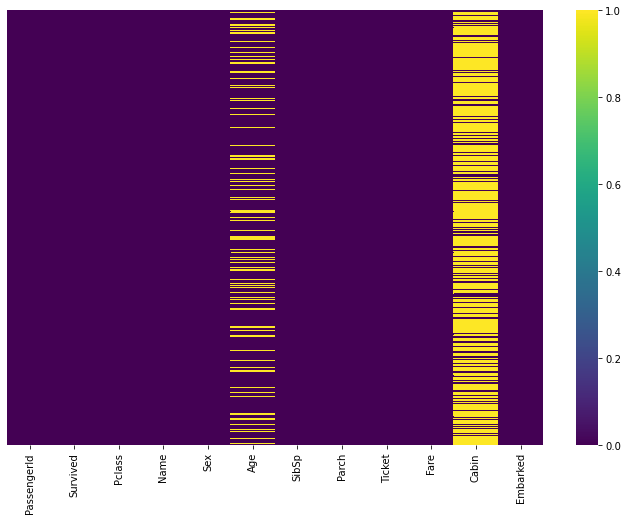

In [17]:
plt.figure(figsize=(12 , 8))  #to expand the image or graph
sns.heatmap(titanic_df.isnull(), yticklabels=False, cmap='viridis') #yticklabels is for removing LHS numbers and cmap is to change the colour

In [18]:
titanic_new=titanic_df.drop(['Cabin','Name'],axis=True)    #drop by default drops an entire row or we can make it drop an entire column
#axis=True is for column-wise operation else it is row-wise

## Drop NA values

In [19]:
titanic_new=titanic_new.dropna()   #drops enitre row that has a missing value

In [20]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 61.2+ KB


In [21]:
titanic_new.describe() #it is for the description of the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Data Preprocessing

In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler(feature_range=(0,1))
min_max.fit(titanic_new[['Age']])

MinMaxScaler()

## Feature Selection

In [23]:
titanic_df.corr() #corr gives correlation

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


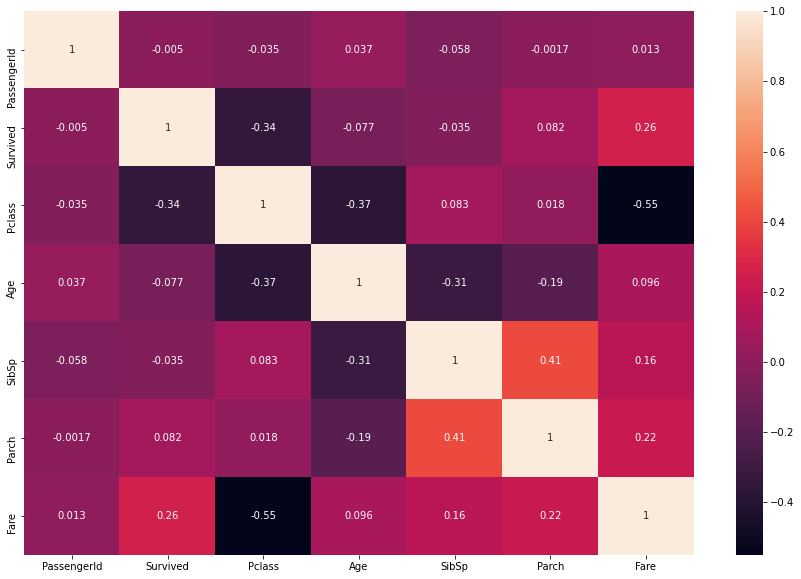

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(titanic_df.corr(), annot=True)

## Matplotlib & Seaborn

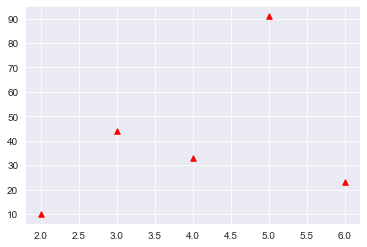

In [25]:
# scatter plot
X = [2,3,4,5,6]
Y = [10,44,33,91,23]
sns.set_style('darkgrid') # to darken the bg
plt.scatter(X,Y,c='red',s=30, marker='^')
plt.show() # to hide the address (output line)

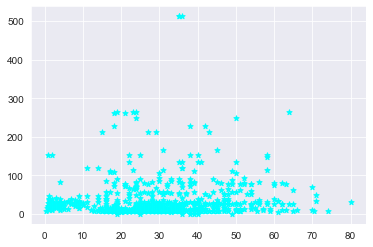

In [26]:
X=titanic_df[['Age']]
Y=titanic_df[['Fare']]
sns.set_style('darkgrid') # to darken the bg
plt.scatter(X,Y,c='cyan',s=30, marker='*')  #s is for the size of the points(marker)
plt.show() # to hide the address (output line)

<BarContainer object of 5 artists>

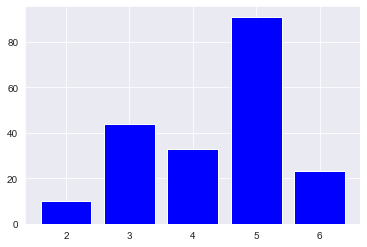

In [27]:
X = [2,3,4,5,6]
Y = [10,44,33,91,23]
plt.bar(X,Y,color='blue') #to draw a bargrph

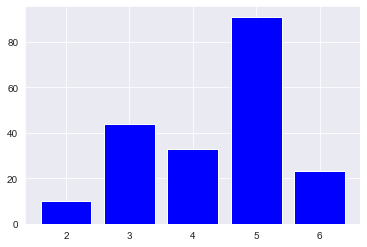

In [28]:
X = [2,3,4,5,6]
Y = [10,44,33,91,23]
plt.bar(X,Y,color='blue') #to draw a bargrph
plt.show() # removes the "<BarContainer object of 5 artists>" shown in the above output

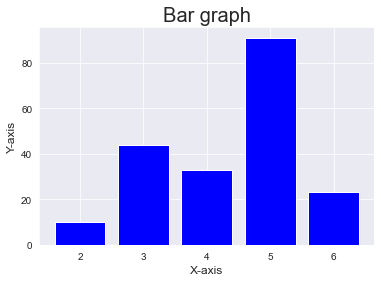

In [29]:
X = [2,3,4,5,6]
Y = [10,44,33,91,23]
plt.bar(X,Y,color='blue') #to draw a bargrph
plt.title("Bar graph",fontdict={'fontsize': 20})
plt.xlabel("X-axis",fontdict={'fontsize': 12})
plt.ylabel("Y-axis",fontdict={'fontsize': 12})
plt.show() # removes the "<BarContainer object of 5 artists>" shown in the above output